Project Setup

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, RFE, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb
import math
from joblib import dump

In [2]:
# Setting Display Max columns and display max rows to None so that it displays all the rows and columns which will 
# help us in initial analysis
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Data Cleaning

In [3]:
# Importing the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,103.00000,0.83415,98.75659,174.04927,65.90780,53.72488,2555.56585,126.90732,3.32976,3.25541,10.14254,104.11707,5125.12195,25.21951,30.75122,13276.71057
std,59.32256,1.24531,6.02178,12.33729,2.14520,2.44352,520.68020,41.64269,0.27084,0.31360,3.97204,39.54417,476.98564,6.54214,6.88644,7988.85233
min,1.00000,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,2.54000,2.07000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
25%,52.00000,0.00000,94.50000,166.30000,64.10000,52.00000,2145.00000,97.00000,3.15000,3.11000,8.60000,70.00000,4800.00000,19.00000,25.00000,7788.00000
50%,103.00000,1.00000,97.00000,173.20000,65.50000,54.10000,2414.00000,120.00000,3.31000,3.29000,9.00000,95.00000,5200.00000,24.00000,30.00000,10295.00000
75%,154.00000,2.00000,102.40000,183.10000,66.90000,55.50000,2935.00000,141.00000,3.58000,3.41000,9.40000,116.00000,5500.00000,30.00000,34.00000,16503.00000
max,205.00000,3.00000,120.90000,208.10000,72.30000,59.80000,4066.00000,326.00000,3.94000,4.17000,23.00000,288.00000,6600.00000,49.00000,54.00000,45400.00000


In [8]:
# Checking the percentage of missing values across all the columns
round(100*(df[df.columns].isnull().sum()/len(df.index)),2)

#no missing values - no need to plug or filter data

car_ID             0.00000
symboling          0.00000
CarName            0.00000
fueltype           0.00000
aspiration         0.00000
doornumber         0.00000
carbody            0.00000
drivewheel         0.00000
enginelocation     0.00000
wheelbase          0.00000
carlength          0.00000
carwidth           0.00000
carheight          0.00000
curbweight         0.00000
enginetype         0.00000
cylindernumber     0.00000
enginesize         0.00000
fuelsystem         0.00000
boreratio          0.00000
stroke             0.00000
compressionratio   0.00000
horsepower         0.00000
peakrpm            0.00000
citympg            0.00000
highwaympg         0.00000
price              0.00000
dtype: float64

Data Cleaning

In [9]:
# Checking whether any duplicate row is present with respect to car id
df['car_ID'].nunique()<205

#Non are present - no need to plug or filter data

False

In [10]:
# Dropping car id, car name, car symboling from car dataframe as they are not going to add value to our analysis
car_df = df.drop('car_ID',axis=1)
car_df = car_df.drop('CarName',axis=1)
car_df = car_df.drop('symboling',axis=1)

Data Analysis

In [11]:
#Before determining which features to utilize, I ma going to build a correlation matrix and heatmap to determine the most correlated
#features for analysis

#Determining the numeric types 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Collating all categorical features under one list
car_cat_cols = list(car_df.select_dtypes(exclude=numerics).columns)


#Pull out numeric columns for correlation matrix
car_num_cols = list(car_df.select_dtypes(include=numerics).columns)
#Pass through to correlation matrix
car_corr = car_df[car_num_cols].corr()

car_corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.00000,0.87459,0.79514,0.58943,0.77639,0.56933,0.48875,0.16096,0.24979,0.35329,-0.36047,-0.47041,-0.54408,0.57782
carlength,0.87459,1.00000,0.84112,0.49103,0.87773,0.68336,0.60645,0.12953,0.15841,0.55262,-0.28724,-0.67091,-0.70466,0.68292
carwidth,0.79514,0.84112,1.00000,0.27921,0.86703,0.73543,0.55915,0.18294,0.18113,0.64073,-0.22001,-0.64270,-0.67722,0.75933
carheight,0.58943,0.49103,0.27921,1.00000,0.29557,0.06715,0.17107,-0.05531,0.26121,-0.10880,-0.32041,-0.04864,-0.10736,0.11934
curbweight,0.77639,0.87773,0.86703,0.29557,1.00000,0.85059,0.64848,0.16879,0.15136,0.75074,-0.26624,-0.75741,-0.79746,0.83530
enginesize,0.56933,0.68336,0.73543,0.06715,0.85059,1.00000,0.58377,0.20313,0.02897,0.80977,-0.24466,-0.65366,-0.67747,0.87414
boreratio,0.48875,0.60645,0.55915,0.17107,0.64848,0.58377,1.00000,-0.05591,0.00520,0.57368,-0.25498,-0.58453,-0.58701,0.55317
stroke,0.16096,0.12953,0.18294,-0.05531,0.16879,0.20313,-0.05591,1.00000,0.18611,0.08094,-0.06796,-0.04214,-0.04393,0.07944
compressionratio,0.24979,0.15841,0.18113,0.26121,0.15136,0.02897,0.00520,0.18611,1.00000,-0.20433,-0.43574,0.32470,0.26520,0.06798
horsepower,0.35329,0.55262,0.64073,-0.10880,0.75074,0.80977,0.57368,0.08094,-0.20433,1.00000,0.13107,-0.80146,-0.77054,0.80814


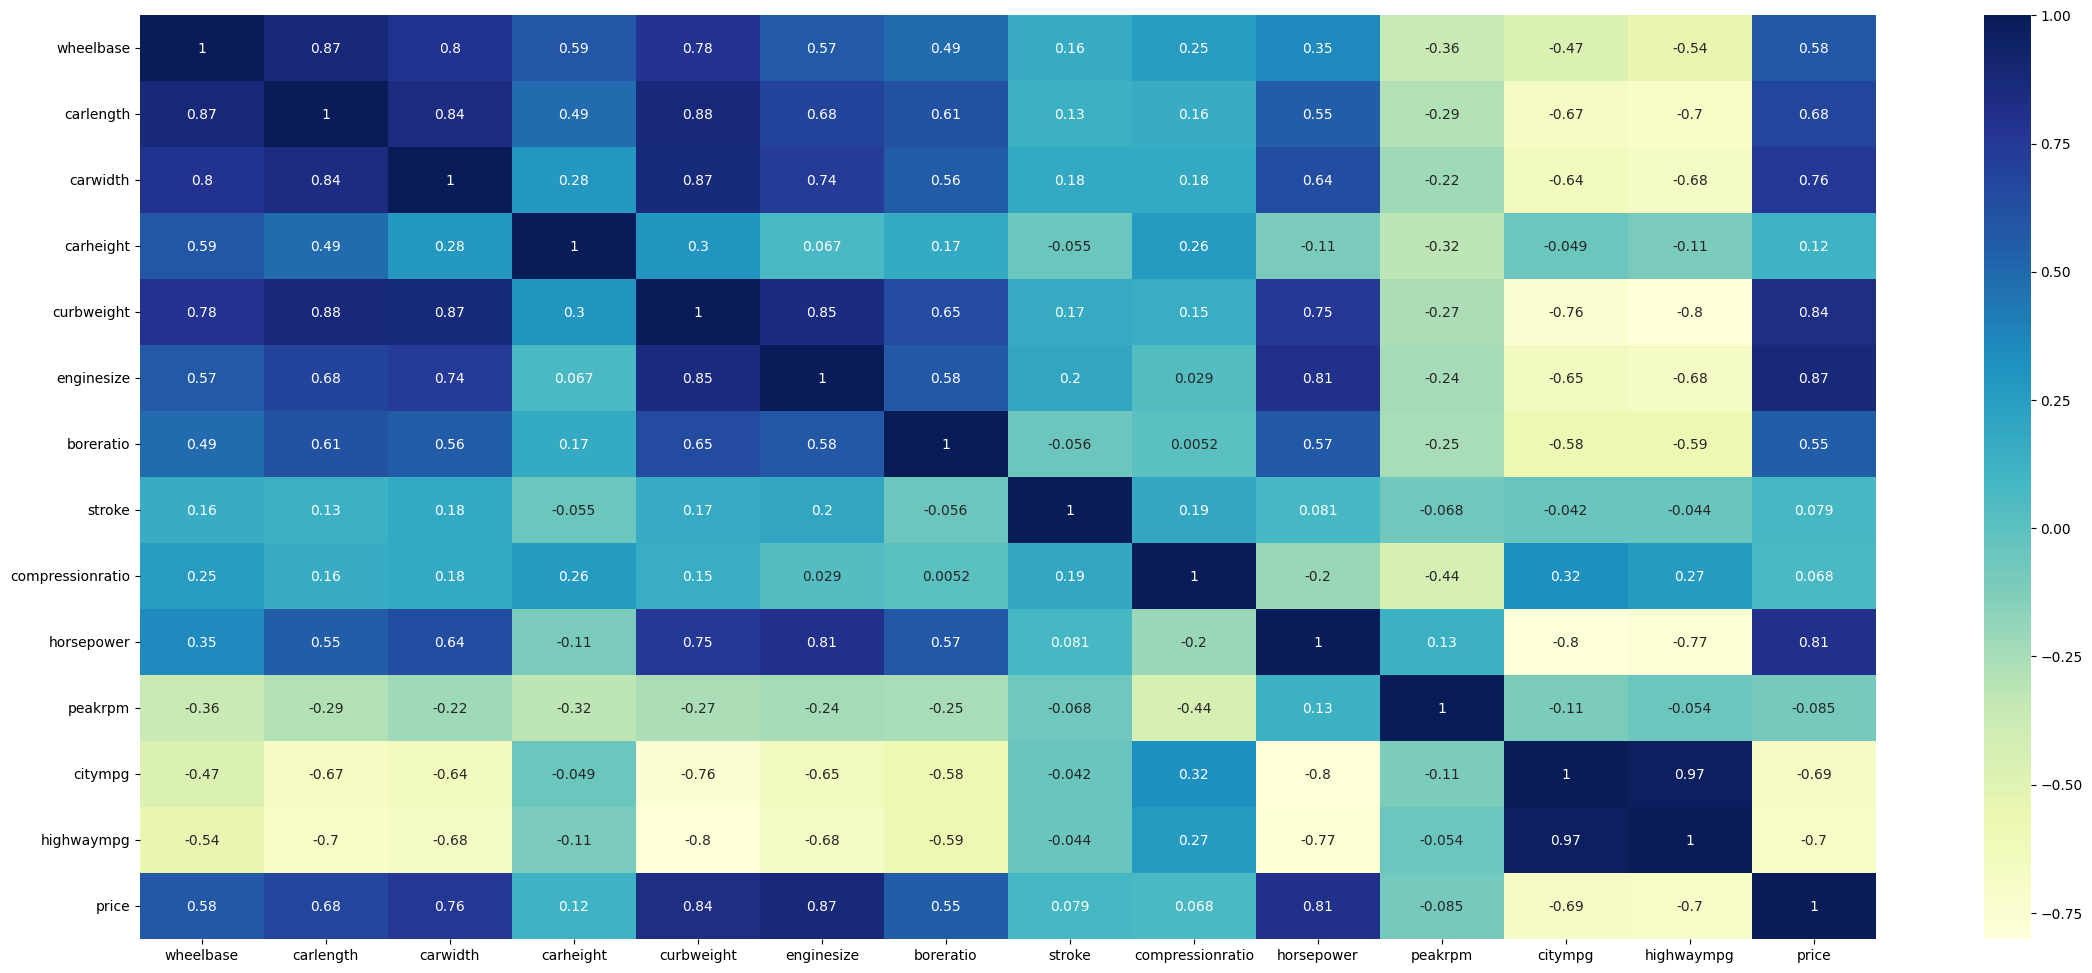

In [12]:
# Plotting the correlation among numerical variables on a heat map
plt.figure(figsize=(28,12))

# plotting heatmap
sns.heatmap(car_corr, cmap="YlGnBu", annot=True)
plt.show()

C:\Users\moona\AppData\Local\Temp\ipykernel_222072\3143906118.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('Blues')


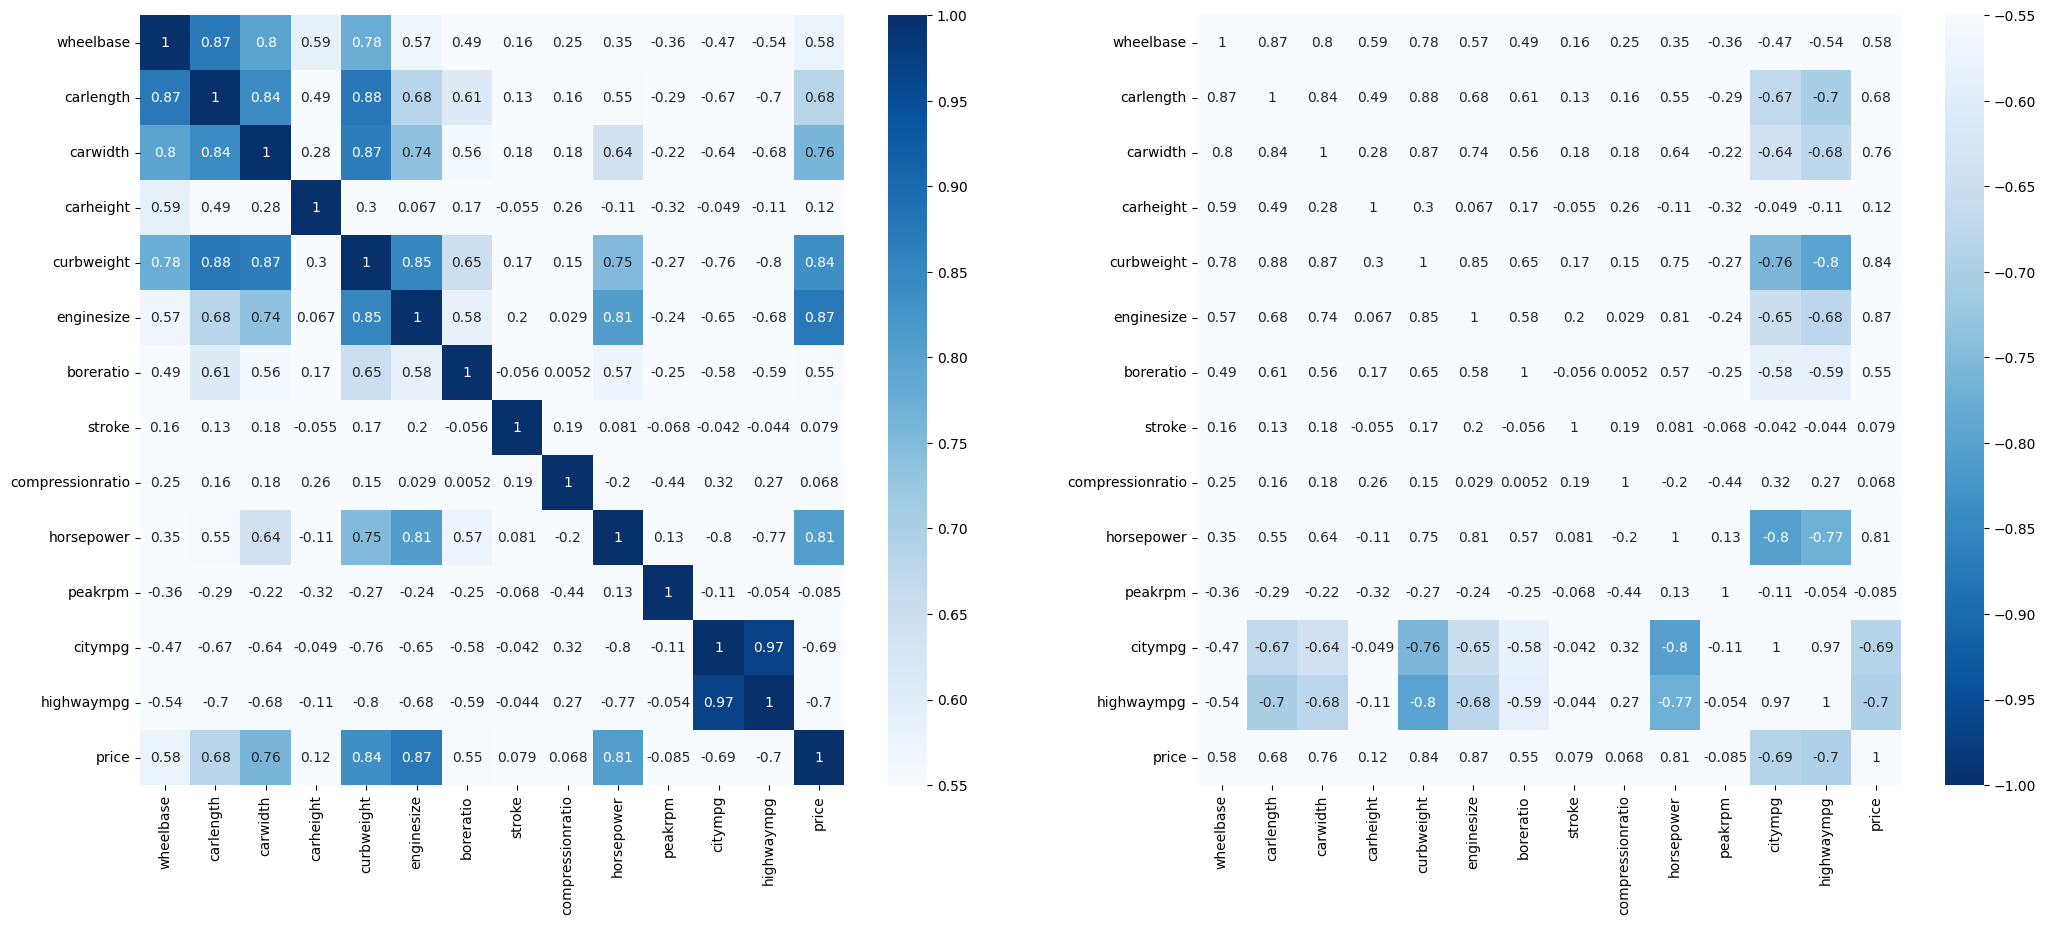

In [13]:
#Plotting the correlation among numerical variables on a heat map
#Strong correlation threshold: >= 0.55 or <= -0.55
#Generate a subplot to identify the features that meet these thresholds

#plotting heatmap
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (25,10))
orig_map = plt.cm.get_cmap('Blues') 
sns.heatmap(car_corr, ax = ax1, cmap=orig_map, annot=True, vmin=0.55, vmax = 1)
sns.heatmap(car_corr, ax = ax2, cmap=orig_map.reversed(), annot=True, vmin=-1, vmax = -0.55)
plt.show();

In [14]:
#The following features appear to have a strong positive correlation with Price
pos_features = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']

#Creating a function to call scatter plot for subplot alignment
def subplot_scatter(subplot_1, subplot_2, subplot_3, x, y):
    plt.subplot(subplot_1, subplot_2, subplot_3)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(car_df[x],car_df[y], c='royalblue', s=4, alpha = 0.65)

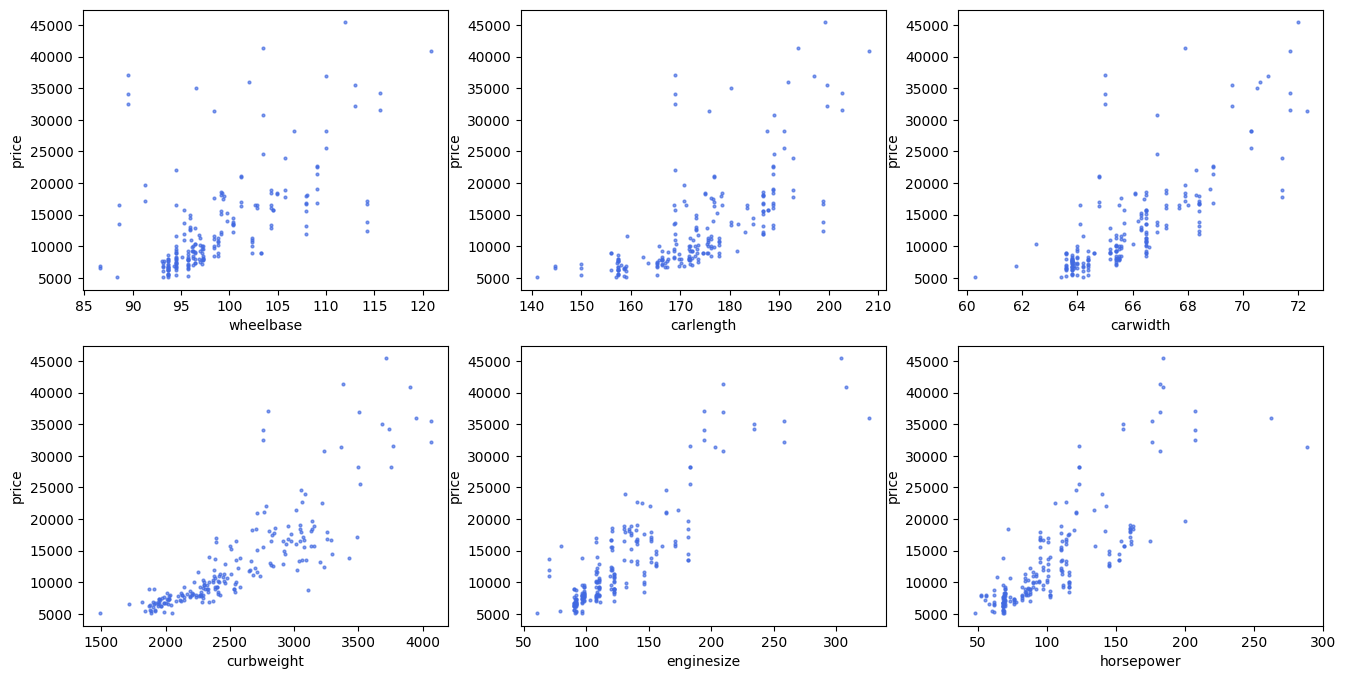

In [15]:
#Plotting the Positively correlated features
plt.figure(figsize=(16,8))
for cnt, i in enumerate(pos_features, start=1):
    subplot_scatter(2,3,cnt, i, 'price')

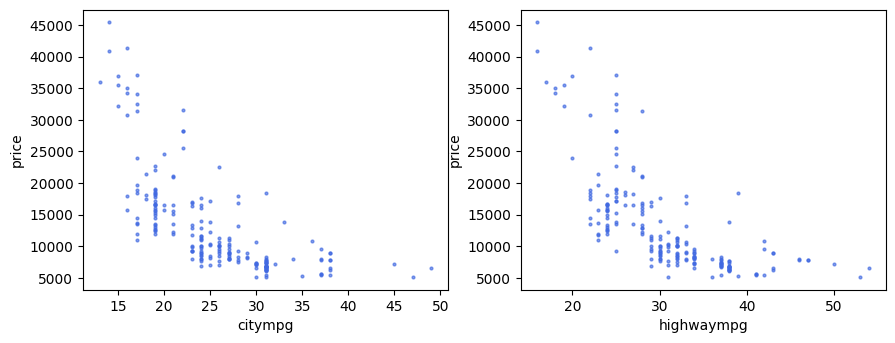

In [16]:
#The following features appear to have a strong negative correlation with Price
neg_features = ['citympg', 'highwaympg']

#Plotting the negatively correlated features
plt.figure(figsize=(16,8))
for cnt, i in enumerate(neg_features, start=1):
    subplot_scatter(2,3,cnt, i, 'price')

In [17]:
# Created a function to plot bar graph between independent variables and price (dependent variable)
def plotBarGraph(df,xLabel,yLabel,graphSize=[]):
    barData = df.plot(kind="bar",figsize=graphSize)
    barData.set_xlabel(xLabel)
    barData.set_ylabel(yLabel)

    for p in barData.patches:
        barData.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')


In [18]:
#created a function to plt features that require binning 
def feature_buckets(col, a, d, n):
    wb = np.array(sorted(car_df[col].unique()))
    wb = np.ceil(wb)
    range = (wb.max() - wb.min())+a
    divider = range/d
    wb_range = []
    i = 0
    while i < d +2:
        x = math.floor(wb.min())-2 + divider*i
        i += 1
        wb_range.append(x)

    car_df[n] = pd.cut(car_df[col],wb_range)
    car_wb = pd.pivot_table(car_df,index=n,values='price',aggfunc='mean')
    plotBarGraph(car_wb, col, 'Price',[8,4])

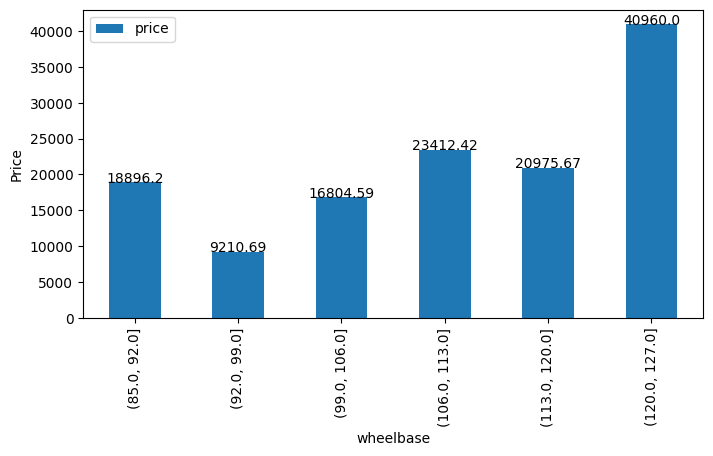

In [19]:
# Checking the number of unique wheel base in ascending order
feature_buckets('wheelbase', 1, 5, 'wheelbase_bucket')

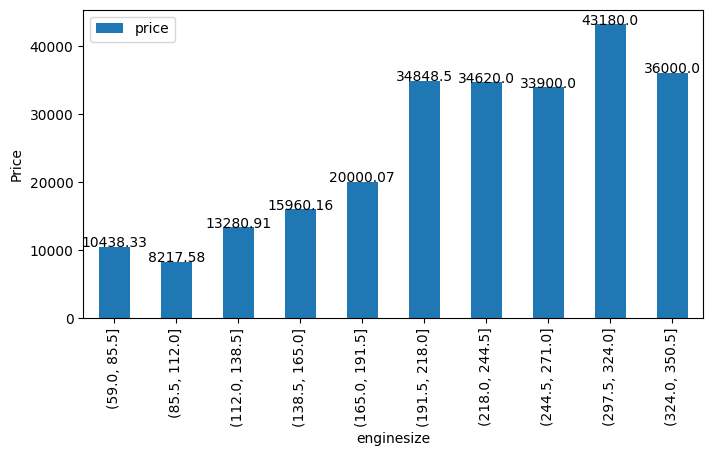

In [20]:
# Checking the number of unique engine size's in ascending order
feature_buckets('enginesize', 0, 10, 'enginesize_bucket')

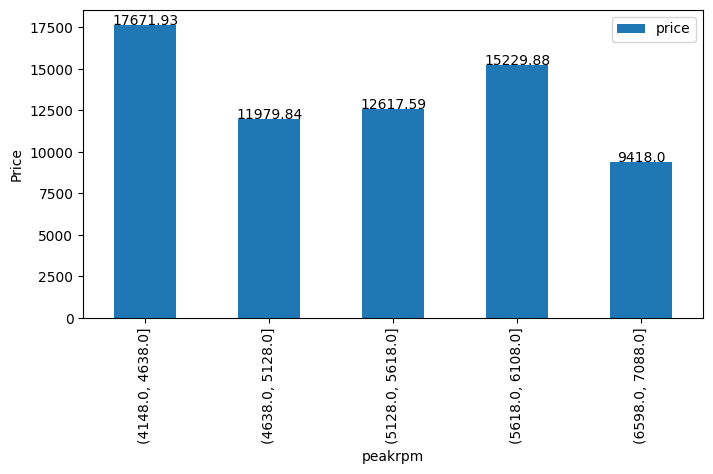

In [21]:
# Checking the number of unique engine size's in ascending order
feature_buckets('peakrpm', 0, 5, 'peakrpm_bucket')

#Based on the distributions - peakrpm could be removed

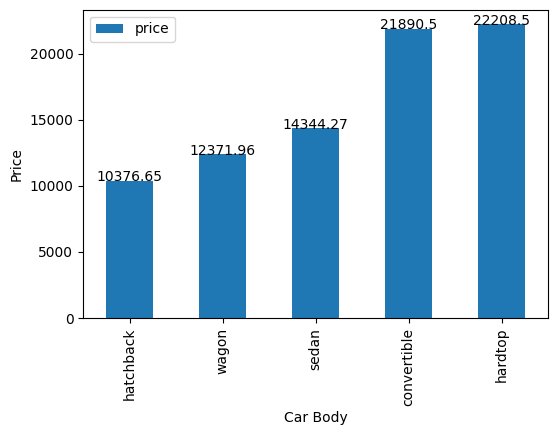

In [22]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different car body categories
carbody_dist = pd.pivot_table(car_df,index='carbody',values='price',aggfunc='mean').sort_values(by='price',ascending=True)
plotBarGraph(carbody_dist, 'Car Body', 'Price',[6,4])

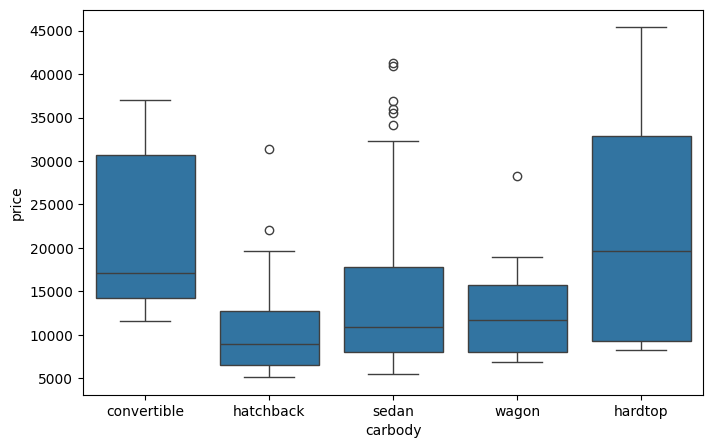

In [23]:
#Created a box plot to check the price distribution across various categories of car body
plt.figure(figsize=(8,5))
sns.boxplot(x= car_df['carbody'], y = car_df['price']);
#There does appear to be be some outliers with the carbody type

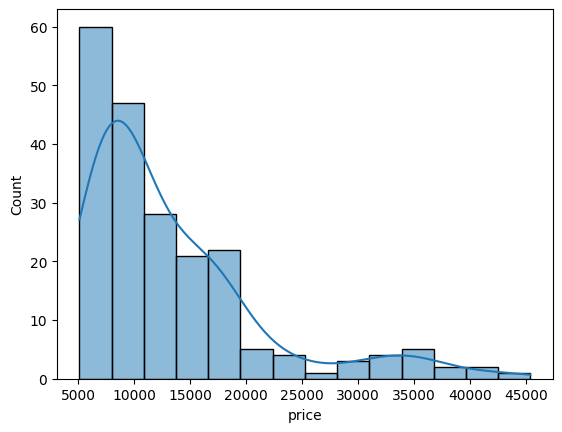

In [24]:
# Checking the distribution of price data
sns.histplot(data = car_df, x = 'price', kde=True) 
sns.set_context(rc = {'patch.linewidth': 0.0});

#right skewed - price outliers present in the data

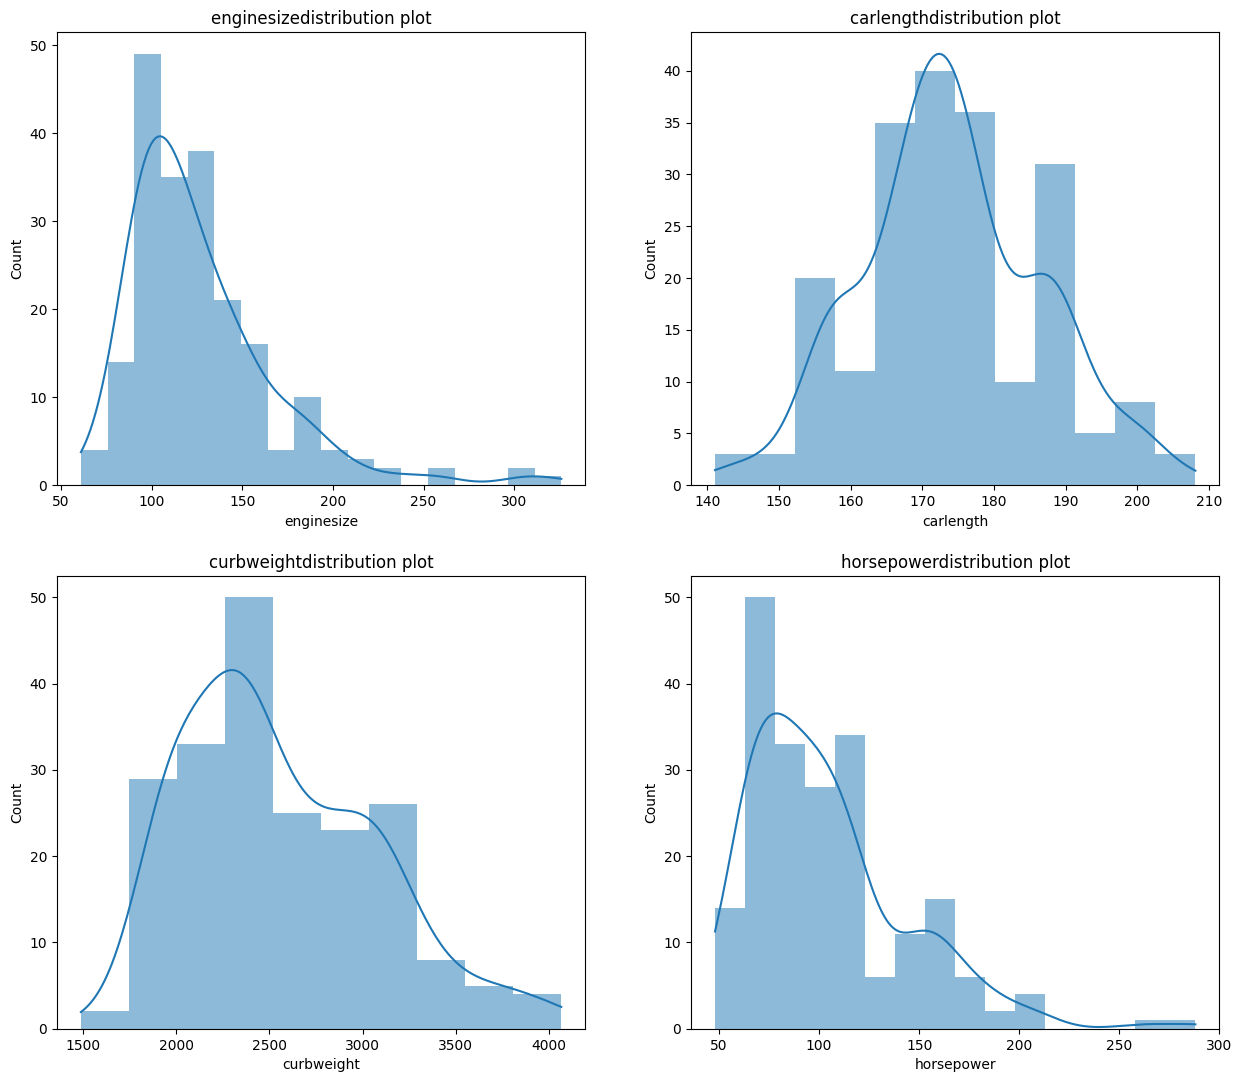

In [25]:
# Checking the data distribution across multiple variables
fig = plt.figure(figsize=(15,20),edgecolor='b')
dist_list = ['enginesize','carlength', 'curbweight', 'horsepower']

z = 1
for i in dist_list:
    plt.subplot(3,2,z)
    plt.title(i +  'distribution plot')
    sns.histplot(car_df[i], kde = True) 
    z+=1



Outliers Analysis

In [26]:
# Describe distribution to check the spread of values and also to detect outliers across all numerical fields
car_df.describe(percentiles=list(map(lambda x: x*.05, range(20))))

#There does appear to be outliers in curbweight, enginesize and horsepower at the 95% range. This is also apparent in the histogram distributions
#above - given its right-skewed nature.
#The outliers don't appear to randomly pull the values in one direction or another. They do appear to be linearly correlated as
#as they increase, therefore none will be removed in this scenario.

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,98.75659,174.04927,65.90780,53.72488,2555.56585,126.90732,3.32976,3.25541,10.14254,104.11707,5125.12195,25.21951,30.75122,13276.71057
std,6.02178,12.33729,2.14520,2.44352,520.68020,41.64269,0.27084,0.31360,3.97204,39.54417,476.98564,6.54214,6.88644,7988.85233
min,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,2.54000,2.07000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
0%,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,2.54000,2.07000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
5%,93.02000,157.14000,63.60000,49.70000,1901.00000,90.00000,2.97000,2.64000,7.50000,62.00000,4250.00000,16.00000,22.00000,6197.00000
10%,93.70000,157.30000,63.80000,50.60000,1947.00000,91.00000,2.97000,2.88200,8.00000,68.00000,4500.00000,17.00000,23.00000,6657.00000
15%,93.70000,158.98000,63.80000,50.80000,1998.00000,92.00000,3.03000,3.03000,8.30000,68.00000,4750.00000,19.00000,24.00000,6968.60000
20%,94.50000,165.30000,63.90000,51.40000,2048.00000,97.00000,3.05000,3.07000,8.50000,69.00000,4800.00000,19.00000,24.80000,7385.80000
25%,94.50000,166.30000,64.10000,52.00000,2145.00000,97.00000,3.15000,3.11000,8.60000,70.00000,4800.00000,19.00000,25.00000,7788.00000


Feature Analysis

In [27]:
#Perform a Chi-Squared Test to select top 10 features
#Feature Extraction Test
array = car_df[car_num_cols].values
X = array[:,:13]
Y = array[:,13]
Y = Y.astype('int')
f_test = SelectKBest(score_func=chi2, k=10)
fit = f_test.fit(X, Y)
print("Fit scores :{}".format(fit.scores_))

features = fit.transform(X)
print(features[0:11,:])

cols_idxs = fit.get_support(indices=True)
features_chi = car_df[car_num_cols].iloc[:, cols_idxs]
features_chi = features_chi.columns
features_chi
#Chi2 analysis indicates the following columns could be key features: 'wheelbase', 'carlength', 'carheight', 'curbweight', 'enginesize',
#'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'

Fit scores :[7.42899178e+01 1.77514836e+02 1.41790872e+01 2.19725603e+01
 2.15915856e+04 2.78172880e+03 4.32194953e+00 5.95378529e+00
 2.99147970e+02 3.04893502e+03 8.91332389e+03 3.43409574e+02
 3.11282360e+02]
[[  88.6  168.8   48.8 2548.   130.     9.   111.  5000.    21.    27. ]
 [  88.6  168.8   48.8 2548.   130.     9.   111.  5000.    21.    27. ]
 [  94.5  171.2   52.4 2823.   152.     9.   154.  5000.    19.    26. ]
 [  99.8  176.6   54.3 2337.   109.    10.   102.  5500.    24.    30. ]
 [  99.4  176.6   54.3 2824.   136.     8.   115.  5500.    18.    22. ]
 [  99.8  177.3   53.1 2507.   136.     8.5  110.  5500.    19.    25. ]
 [ 105.8  192.7   55.7 2844.   136.     8.5  110.  5500.    19.    25. ]
 [ 105.8  192.7   55.7 2954.   136.     8.5  110.  5500.    19.    25. ]
 [ 105.8  192.7   55.9 3086.   131.     8.3  140.  5500.    17.    20. ]
 [  99.5  178.2   52.  3053.   131.     7.   160.  5500.    16.    22. ]
 [ 101.2  176.8   54.3 2395.   108.     8.8  101.  5800.  

Index(['wheelbase', 'carlength', 'carheight', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [28]:
model = xgb.XGBRegressor()
rfe = RFE(model, n_features_to_select = 10, step=1)
fit = rfe.fit(X,Y)
print("Num features: {}".format(fit.n_features_))
print("Selected features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

cols_idxs = fit.get_support(indices=True)
features_rfe = car_df[car_num_cols].iloc[:, cols_idxs]
features_rfe = features_rfe.columns
features_rfe
#RFE analysis indicates the following columns could be key features: 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
#      'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg'

Num features: 10
Selected features: [False False  True  True  True  True  True  True  True  True  True False
  True]
Feature Ranking: [4 2 1 1 1 1 1 1 1 1 1 3 1]


Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg'],
      dtype='object')

Data Preparation

In [29]:
# Performing one hot encoding in order to convert categorical variables to numeric
#Initialize encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
#categorical column values from above
ohe.fit(car_df[car_cat_cols])
#transform the values
car_ohe = ohe.transform(car_df[car_cat_cols])
#convert to a dataframe
car_df_ohe = pd.DataFrame(car_ohe, columns = ohe.get_feature_names_out(input_features = car_cat_cols))
car_df_ohe.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [30]:
car_df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'wheelbase_bucket',
       'enginesize_bucket', 'peakrpm_bucket'],
      dtype='object')

In [31]:
#joblib dump for streamlit app
#dump(ohe, 'model/ohe.joblib')

['model/ohe.joblib']

In [32]:
#Dropping all the original categorical variables as we 
#already created dummies for each
car_df = car_df.drop(list(car_cat_cols), axis=1)

#dropping arbitrary buckets created in analysis
car_df.drop(['wheelbase_bucket','enginesize_bucket'], axis = 1, inplace = True)

#dropping peakrpm as it did not show a clear correlation to price
car_df = car_df.drop('peakrpm_bucket', axis=1)

#Extracting Y value fromfeature set
#Y = car_df['price']

#Testing Featureset with various columns based on data anlysis, chi-squared analsyis and RFE
# Concatenating all the dummy variables with the original dataframe
car_df = pd.concat([car_df, car_df_ohe], axis=1)

In [33]:
car_df.shape

(205, 52)

In [34]:
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


Build the train and test split

In [35]:
# Dividing the entire data into X and y that is all independent feature into X and dependent feature to y
X=car_df
y=car_df.pop('price')

In [36]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [37]:
# Performed scaling using StandardScaler on all numeric variables except price that is the target feature
car_num_cols.remove('price')
scaler = StandardScaler()
scaler.fit(X_train[car_num_cols])

#Scaling - ML algos converge faster when values on the same scale; the intent
#is to convert the values into normally distributed values
X_train[car_num_cols] = scaler.transform(X_train[car_num_cols])
X_test[car_num_cols] = scaler.transform(X_test[car_num_cols])

In [38]:
#joblib dump for streamlit app
#dump(scaler, 'model/scaler.joblib')

['model/scaler.joblib']

Model Building

In [39]:
# Creating an XGBRegression object with default paramters
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [40]:
# Fitting the XGBRegression model on the train dataset
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# Predicting on the test dataset
y_pred_test = xgb_reg.predict(X_test)

r2score = round(r2_score(y_pred_test,y_test),2)*100

In [42]:
# Calculating the R2 score on the test dataset
print("R2 Score on Test Data is : ",r2score)

R2 Score on Test Data is :  95.0


In [43]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)

rmse = round(math.sqrt(mse),2)

print(rmse)

2222.69


In [44]:
#HPT - Random Search for XGBoost Regression

# Performing RandomizedSearchCV for hyperparameter tuning
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)

# Fitting on the validation set
random_search.fit(X_test, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [45]:
# Printing the best score that we can get using the parameters
print('We can get score of :',random_search.best_score_,' using',random_search.best_params_)

We can get score of : 0.5967824033354852  using {'subsample': 1.0, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [46]:
# Creating XGBRegression model with the select hyperparameters
xgb_reg_hpt = xgb.XGBRegressor(subsample=1, n_estimators=750, min_child_weight=1,max_depth=12,
                               learning_rate=0.25, gamma=1, colsample_bytree=0.6, n_jobs = -1)
xgb_reg_hpt.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.6,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 1,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.25,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 12,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 750,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [47]:
# Fitting the model on the train set
xgb_reg_hpt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=750, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
# Predicting on the test set
y_pred_test_hpt = xgb_reg_hpt.predict(X_test)

# Calculating R2 score on test set
r2score = round(r2_score(y_pred_test_hpt,y_test),2)*100

In [49]:
# Printing the R2 score on test dataset
print("R2 score on Test Data is : ",r2score)

R2 score on Test Data is :  94.0


In [50]:
# Calculating Mean Sqaured Error & Root Mean Squared Error of the test set
mse = mean_squared_error(y_test, y_pred_test_hpt)

rmse = round(math.sqrt(mse),2)

print(rmse)

2256.16


In [51]:
# Calculating R2 score

y_train_pred = xgb_reg_hpt.predict(X_train)
y_test_pred = xgb_reg_hpt.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  100.0
R2 score on Test data :  94.0


In [52]:
#Dumping/Storing the model object into a file for later use
#dump(xgb_reg_hpt, 'model/XGBoost.joblib')

['model/XGBoost.joblib']

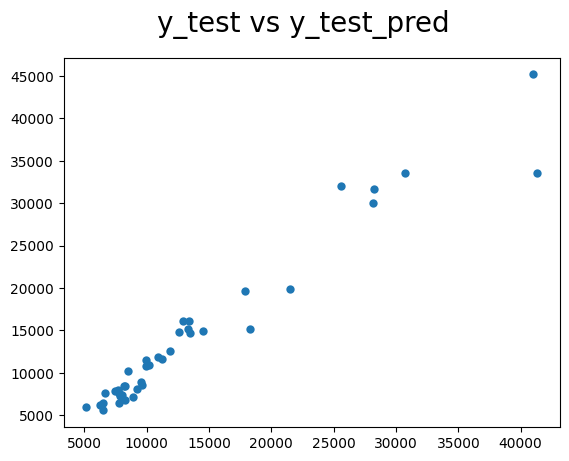

In [53]:
# Plotting a scatter plot of the actual and predicted values of the test set
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)

In [54]:
# Creating a dataframe containing the features names and its corresponding coefficient values
linear_model_parameter = list(abs(xgb_reg_hpt.feature_importances_))
cols = X_train.columns
lm_model_df = pd.DataFrame(list(zip(cols,linear_model_parameter)))
lm_model_df.columns = ['Feature','Coef']

In [55]:
# Only selecting the features whose coeficient values are greater than 0
lm_model_df = lm_model_df[lm_model_df['Coef']>0]

In [56]:
# Sorted the created dataframe containing the features names and its corresponding coefficient values in descending order 
# inorder to get the top coefficients
lm_model_df.sort_values(by='Coef',ascending=False).reset_index(drop=True)

,Feature,Coef
0,cylindernumber_four,0.37057
1,enginesize,0.30899
2,horsepower,0.16145
3,curbweight,0.04113
4,highwaympg,0.02126
5,boreratio,0.00977
6,peakrpm,0.00950
7,enginetype_ohc,0.00895
8,wheelbase,0.00865
9,drivewheel_rwd,0.00864
